In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Instalar Ultralytics

In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 56.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

# Baixar o Dataset

In [2]:
!unzip /content/drive/MyDrive/DIO/FaceDetection/NeyMessi.v1.zip -d dataset

Archive:  /content/drive/MyDrive/DIO/FaceDetection/NeyMessi.v1.zip
  inflating: dataset/README.dataset.txt  
  inflating: dataset/README.roboflow.txt  
  inflating: dataset/data.yaml       
   creating: dataset/train/
   creating: dataset/train/images/
 extracting: dataset/train/images/0005ec2377_jpg.rf.90f57fbb6c83f53d40c350d37660251d.jpg  
 extracting: dataset/train/images/0005ec2377_jpg.rf.f63adcb4e0e4368b664d1001825fb4e6.jpg  
 extracting: dataset/train/images/01eb0b6eaf_jpg.rf.1232a46bed7e3a06d100504ea4e2419f.jpg  
 extracting: dataset/train/images/02f169fe68_jpg.rf.9bcbfcedab0e726201481dbcf331322e.jpg  
 extracting: dataset/train/images/03af636fb3_jpg.rf.28010733a67d421ed59897683fdd2c9a.jpg  
 extracting: dataset/train/images/04e0263d75_jpg.rf.a886bb7864ef0ab82cd2161be37f67aa.jpg  
 extracting: dataset/train/images/0d66e544f4_jpg.rf.1e5b47e934a4c9aff961a5c576ed1387.jpg  
 extracting: dataset/train/images/0d6f76a623_jpg.rf.42181c6e8fe510a1e26c1430464f696d.jpg  
 extracting: datase

Depois de baixar o dataset, tem que arrumar o arquivo data.yaml pra refletir o que queremos.



path: /content/dataset  # Caminho para o dataset
train: train/images     # Caminho para as imagens de treinamento
val: valid/images       # Caminho para as imagens de validação

# Número de classes
nc: 3

# Nomes das classes
names: ['Messi', 'Neymar', 'Outros']

# Baixar e treinar o modelo

In [4]:
from ultralytics import YOLO

# Carregar um modelo YOLOv8 pré-treinado
model = YOLO('yolov8n.pt')  # Você pode usar 'yolov8s.pt', 'yolov8m.pt', etc.

# Treinar o modelo
results = model.train(
    data='/content/dataset/data.yaml',  # Caminho para o arquivo data.yaml
    epochs=50,                          # Número de épocas
    imgsz=640,                          # Tamanho da imagem
    batch=8,                            # Tamanho do lote
    name='yolov8_face_classification'   # Nome do experimento
)

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=50, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8_face_classification, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_c

100%|██████████| 5.35M/5.35M [00:00<00:00, 168MB/s]


AMP: checks passed ✅


train: Scanning /content/dataset/train/labels... 110 images, 0 backgrounds, 0 corrupt: 100%|██████████| 110/110 [00:00<00:00, 2030.02it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/dataset/valid/labels... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<00:00, 1757.96it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/yolov8_face_classification/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/yolov8_face_classification
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      1.19G       1.96      3.786      1.923         23        640: 100%|██████████| 14/14 [00:05<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

                   all         37         81    0.00314       0.52      0.174     0.0834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      1.18G      1.632      3.052       1.64         18        640: 100%|██████████| 14/14 [00:02<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.22it/s]

                   all         37         81    0.00406      0.565      0.294      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      1.18G      1.571      2.566      1.552         23        640: 100%|██████████| 14/14 [00:02<00:00,  6.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.89it/s]

                   all         37         81     0.0055      0.778      0.376      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      1.15G      1.559      2.413      1.513         16        640: 100%|██████████| 14/14 [00:02<00:00,  6.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.46it/s]

                   all         37         81      0.231      0.335      0.353      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      1.18G      1.511      2.304      1.471         26        640: 100%|██████████| 14/14 [00:03<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.11it/s]

                   all         37         81      0.612      0.386      0.478       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      1.18G      1.482      2.219      1.494         18        640: 100%|██████████| 14/14 [00:02<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.97it/s]

                   all         37         81      0.411       0.49       0.47      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      1.18G      1.495      2.205      1.492         33        640: 100%|██████████| 14/14 [00:02<00:00,  6.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]

                   all         37         81      0.462      0.597      0.546      0.276



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      1.18G      1.387      2.151      1.456         24        640: 100%|██████████| 14/14 [00:02<00:00,  6.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.34it/s]


                   all         37         81      0.472      0.582      0.571      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      1.18G      1.488      2.227      1.535         16        640: 100%|██████████| 14/14 [00:02<00:00,  6.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.06it/s]

                   all         37         81      0.472      0.648      0.562      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       1.2G      1.496      2.047      1.472         26        640: 100%|██████████| 14/14 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.23it/s]

                   all         37         81      0.418      0.729      0.523      0.246



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      1.18G      1.521      2.039      1.487         18        640: 100%|██████████| 14/14 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]

                   all         37         81      0.456       0.74      0.558      0.262



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      1.18G      1.474      2.104      1.477         14        640: 100%|██████████| 14/14 [00:02<00:00,  6.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.24it/s]


                   all         37         81      0.472       0.71      0.592      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      1.18G      1.469      2.021      1.442         13        640: 100%|██████████| 14/14 [00:02<00:00,  6.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]


                   all         37         81      0.614      0.671      0.669      0.345

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      1.18G      1.399      1.935      1.418         18        640: 100%|██████████| 14/14 [00:03<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.09it/s]

                   all         37         81      0.784      0.605      0.675      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      1.18G      1.428      1.894      1.445         16        640: 100%|██████████| 14/14 [00:03<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]


                   all         37         81       0.67      0.619      0.656      0.301

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      1.18G      1.426      1.861      1.402         16        640: 100%|██████████| 14/14 [00:02<00:00,  6.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]

                   all         37         81      0.602       0.76      0.728      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      1.18G      1.467      1.874      1.456         13        640: 100%|██████████| 14/14 [00:02<00:00,  6.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.93it/s]

                   all         37         81      0.619      0.797       0.71      0.369



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      1.18G      1.424      1.802      1.403         16        640: 100%|██████████| 14/14 [00:02<00:00,  6.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.89it/s]

                   all         37         81      0.688      0.761      0.732      0.409



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      1.18G      1.377      1.727      1.368         13        640: 100%|██████████| 14/14 [00:03<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]

                   all         37         81      0.654      0.783      0.699      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      1.18G      1.357       1.67      1.329         21        640: 100%|██████████| 14/14 [00:02<00:00,  5.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.65it/s]

                   all         37         81      0.698      0.706      0.713      0.364



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      1.18G       1.28      1.636      1.333         26        640: 100%|██████████| 14/14 [00:02<00:00,  6.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.26it/s]


                   all         37         81      0.684      0.769      0.712      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      1.18G      1.391      1.696      1.406          9        640: 100%|██████████| 14/14 [00:02<00:00,  6.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.81it/s]

                   all         37         81      0.635      0.784      0.721      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      1.18G      1.379      1.648      1.391         15        640: 100%|██████████| 14/14 [00:02<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.88it/s]

                   all         37         81      0.663      0.693      0.722      0.393



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      1.18G      1.294      1.566      1.309         24        640: 100%|██████████| 14/14 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.09it/s]

                   all         37         81      0.743      0.773      0.759       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      1.18G      1.258       1.47      1.282         10        640: 100%|██████████| 14/14 [00:02<00:00,  6.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.96it/s]

                   all         37         81       0.67       0.83       0.75      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      1.18G      1.338      1.426       1.29         29        640: 100%|██████████| 14/14 [00:02<00:00,  6.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.87it/s]

                   all         37         81      0.718      0.783      0.747      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      1.18G      1.315      1.402       1.34         18        640: 100%|██████████| 14/14 [00:02<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.11it/s]


                   all         37         81      0.758      0.734       0.76      0.414

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      1.19G       1.33      1.555      1.345         11        640: 100%|██████████| 14/14 [00:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.63it/s]

                   all         37         81      0.708      0.811      0.802      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      1.18G      1.317      1.491      1.311         14        640: 100%|██████████| 14/14 [00:03<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.03it/s]

                   all         37         81       0.79      0.739      0.786      0.437



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      1.18G      1.296      1.511      1.372         26        640: 100%|██████████| 14/14 [00:02<00:00,  6.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.32it/s]

                   all         37         81       0.77      0.733      0.828      0.449



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      1.18G      1.174      1.387      1.277         32        640: 100%|██████████| 14/14 [00:02<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]

                   all         37         81       0.64      0.865      0.762      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      1.18G      1.218      1.421      1.278         17        640: 100%|██████████| 14/14 [00:02<00:00,  6.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.80it/s]


                   all         37         81       0.65      0.863      0.781      0.427

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      1.18G      1.199      1.428      1.297          7        640: 100%|██████████| 14/14 [00:03<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.35it/s]

                   all         37         81      0.683      0.791      0.795      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      1.18G      1.239      1.336      1.284         21        640: 100%|██████████| 14/14 [00:02<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.43it/s]


                   all         37         81      0.693      0.771      0.773      0.408

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      1.18G      1.265      1.394       1.27         12        640: 100%|██████████| 14/14 [00:02<00:00,  6.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.77it/s]

                   all         37         81      0.719      0.702      0.769      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      1.18G      1.278      1.355      1.272         29        640: 100%|██████████| 14/14 [00:02<00:00,  6.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.72it/s]

                   all         37         81      0.728      0.782      0.768      0.411



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      1.18G      1.273      1.352      1.307         29        640: 100%|██████████| 14/14 [00:02<00:00,  6.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.56it/s]

                   all         37         81      0.705      0.718      0.725      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      1.18G      1.219      1.401      1.265         24        640: 100%|██████████| 14/14 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.68it/s]

                   all         37         81        0.7      0.751      0.746      0.404



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      1.18G      1.118      1.241      1.216         19        640: 100%|██████████| 14/14 [00:02<00:00,  6.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.79it/s]

                   all         37         81      0.752      0.714      0.761      0.407



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      1.18G      1.133      1.211      1.207         11        640: 100%|██████████| 14/14 [00:02<00:00,  6.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.46it/s]


                   all         37         81      0.799      0.737      0.774      0.408
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      1.18G      1.012      1.261       1.18          6        640: 100%|██████████| 14/14 [00:02<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.29it/s]


                   all         37         81      0.771      0.764      0.816      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      1.18G      1.079      1.242      1.197         13        640: 100%|██████████| 14/14 [00:03<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.39it/s]

                   all         37         81      0.804      0.731      0.808      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      1.19G      1.044      1.208      1.196          9        640: 100%|██████████| 14/14 [00:03<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.04it/s]


                   all         37         81      0.766      0.755        0.8      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      1.18G      1.019      1.253      1.196          6        640: 100%|██████████| 14/14 [00:02<00:00,  6.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.15it/s]


                   all         37         81      0.806      0.746      0.809      0.412

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      1.18G      1.058      1.241      1.205          9        640: 100%|██████████| 14/14 [00:01<00:00,  7.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.85it/s]

                   all         37         81      0.801      0.773      0.815      0.422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      1.18G      1.035      1.179      1.163         22        640: 100%|██████████| 14/14 [00:02<00:00,  6.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.48it/s]

                   all         37         81      0.808      0.782      0.816      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      1.18G     0.9246      1.131      1.136         14        640: 100%|██████████| 14/14 [00:03<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.05it/s]

                   all         37         81      0.807      0.782      0.819      0.453



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      1.18G     0.9114      1.106       1.13          7        640: 100%|██████████| 14/14 [00:02<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.94it/s]

                   all         37         81      0.812      0.783      0.834      0.452



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      1.18G     0.9553      1.109      1.159          6        640: 100%|██████████| 14/14 [00:01<00:00,  7.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.31it/s]

                   all         37         81      0.829      0.782      0.834      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      1.18G     0.9502      1.097      1.165          7        640: 100%|██████████| 14/14 [00:01<00:00,  7.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  9.20it/s]


                   all         37         81      0.857      0.783      0.837      0.449

50 epochs completed in 0.051 hours.
Optimizer stripped from runs/detect/yolov8_face_classification/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8_face_classification/weights/best.pt, 6.2MB

Validating runs/detect/yolov8_face_classification/weights/best.pt...
Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.42it/s]


                   all         37         81      0.811      0.783      0.835      0.451
                 Messi         15         15      0.637      0.733      0.735      0.438
                Neymar         23         23      0.952       0.86      0.936       0.53
                Outros         11         43      0.844      0.756      0.833      0.384
Speed: 0.5ms preprocess, 3.3ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to runs/detect/yolov8_face_classification


In [5]:
metrics = model.val()  # Avaliar o modelo no conjunto de validação
print(metrics)         # Exibir as métricas

Ultralytics 8.3.70 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 168 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/dataset/valid/labels.cache... 37 images, 0 backgrounds, 0 corrupt: 100%|██████████| 37/37 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.74it/s]


                   all         37         81      0.812      0.783      0.834      0.452
                 Messi         15         15       0.64      0.733      0.732      0.436
                Neymar         23         23      0.952      0.861      0.936       0.53
                Outros         11         43      0.844      0.755      0.833       0.39
Speed: 1.7ms preprocess, 17.5ms inference, 0.0ms loss, 8.0ms postprocess per image
Results saved to runs/detect/yolov8_face_classification2
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fc883635410>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.0

In [6]:
model = YOLO('/content/runs/detect/yolov8_face_classification/weights/best.pt')

#Aplicar inferência em qualquer imagem

In [37]:
import cv2
import matplotlib.pyplot as plt

image_path = '/content/dataset/neymessi.jpg'
image = cv2.imread(image_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Converter para RGB (Matplotlib usa RGB)



results = model(image)

# Exibir os resultados
for result in results:
    boxes = result.boxes  # Caixas delimitadoras
    classes = boxes.cls   # Classes detectadas
    confidences = boxes.conf  # Confianças das detecções

    for box, cls, conf in zip(boxes, classes, confidences):
        x1, y1, x2, y2 = box.xyxy[0].tolist()  # Coordenadas da caixa
        label = model.names[int(cls)]          # Nome da classe
        confidence = float(conf)               # Confiança

        print(f"Detectado: {label} com confiança {confidence:.2f}")


0: 640x640 1 Messi, 1 Neymar, 1 Outros, 36.0ms
Speed: 5.0ms preprocess, 36.0ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)
Detectado: Messi com confiança 0.94
Detectado: Neymar com confiança 0.91
Detectado: Outros com confiança 0.30


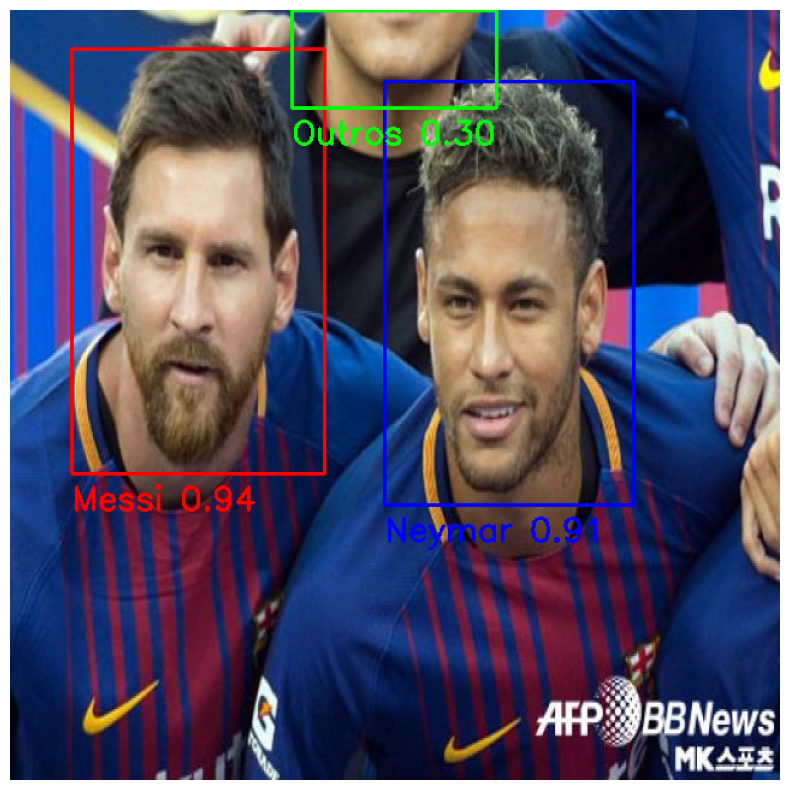

In [40]:

# Desenhar as caixas delimitadoras e as classificações na imagem
for result in results:
    boxes = result.boxes  # Caixas delimitadoras
    classes = boxes.cls   # Classes detectadas
    confidences = boxes.conf  # Confianças das detecções

    for box, cls, conf in zip(boxes, classes, confidences):
        x1, y1, x2, y2 = map(int, box.xyxy[0].tolist())  # Coordenadas da caixa
        label = model.names[int(cls)]  # Nome da classe (Neymar, Messi, Outros)
        confidence = float(conf)  # Confiança da detecção



        # Adicionar o rótulo e a confiança
        if label == "Messi":
            # Desenhar a caixa delimitadora
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (255,0, 0), 2)
            # Escrever na caixa
            text = f"{label} {confidence:.2f}"
            cv2.putText(image_rgb, text, (x1, y2 + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

        elif label == "Neymar":
            # Desenhar a caixa delimitadora
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 0, 255), 2)
            # Escrever na caixa
            text = f"{label} {confidence:.2f}"
            cv2.putText(image_rgb, text, (x1, y2 + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0,255), 2)

        else:
            # Desenhar a caixa delimitadora
            cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
            # Escrever na caixa
            text = f"{label} {confidence:.2f}"
            cv2.putText(image_rgb, text, (x1, y2 + 30), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0,255, 0), 2)

# Exibir a imagem com as detecções usando Matplotlib
plt.figure(figsize=(10, 10))
plt.imshow(image_rgb)
plt.axis('off')  # Remover os eixos
plt.show()

In [ ]:
model.export(format='onnx')  # Exportar para ONNX